In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem,DataStructs
from skimpy import skim
from rdkit.Chem import Descriptors,AllChem
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score, confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv('Data1.csv')
df.head()

,Unnamed: 0,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,target
0,0,NaN,NaN,105745.0,[],CHEMBL882330,inhibitory concentration required to inhibit n...,B,NaN,NaN,...,Neuraminidase,211044,NaN,NaN,IC50,uM,UO_0000065,NaN,40.000,CHEMBL2051
1,1,NaN,NaN,106883.0,[],CHEMBL882330,inhibitory concentration required to inhibit n...,B,NaN,NaN,...,Neuraminidase,211044,NaN,NaN,IC50,uM,UO_0000065,NaN,0.100,CHEMBL2051
2,2,NaN,NaN,113311.0,[],CHEMBL882330,inhibitory concentration required to inhibit n...,B,NaN,NaN,...,Neuraminidase,211044,NaN,NaN,IC50,uM,UO_0000065,NaN,10.000,CHEMBL2051
3,3,NaN,NaN,113312.0,[],CHEMBL882330,inhibitory concentration required to inhibit n...,B,NaN,NaN,...,Neuraminidase,211044,NaN,NaN,IC50,nM,UO_0000065,NaN,1.400,CHEMBL2051
4,4,NaN,NaN,114254.0,[],CHEMBL808314,Inhibitory activity against influenza A virus ...,B,NaN,NaN,...,Neuraminidase,211044,NaN,NaN,IC50,uM,UO_0000065,NaN,0.002,CHEMBL2051


In [3]:
skim(df)

c:\users\03aay\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5632   │ │ string      │ 32    │                                                          │
│ │ Number of columns │ 48     │ │ float64     │ 14    │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_nam ┃      ┃            ┃           ┃            ┃        ┃         ┃          ┃           ┃        ┃  │
│ ┃ e          ┃ NA   ┃ NA %       ┃ mean      ┃ sd         ┃ p0     ┃ p25     ┃ p75      ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Unnamed: 0 │    0 │          0 │      2800 │       1600 │      0 │    1400 │     4200 │      5600 │ ██████ │  │
│ │ activity_i │    0 │          0 │  12000000 │    7200000 │ 110000 │ 3600000 │ 18000000 │  25000000 │ ▅▁▁▃█  │  │
│ │ d          │      │            │           │            │        │         │          │           │        │  │
│ │ document_y │    0 │          0 │      2000 │        6.2 │   2000 │    2000 │     2000 │      2000 │ ▃▁▂▇█▇ │  │
│ │ ear        │      │            │           │            │        │         │          │           │        │  │
│ │ pchembl_va │ 1548 │ 27.4857954 │       6.2 │        1.5 │      3 │       5 │      7.2 │        11 │ ▁█▇▄▃  │  │
│ │ lue        │      │   54545453 │           │            │        │         │          │           │        │  │
│ │ potential_ │    0 │          0 │     0.082 │       0.27 │      0 │       0 │        0 │         1 │ █    ▁ │  │
│ │ duplicate  │      │            │           │            │        │         │          │           │        │  │
│ │ record_id  │    0 │          0 │   2000000 │    1100000 │  23000 │  980000 │  3000000 │   3900000 │ ▃▃▄▅█▁ │  │
│ │ src_id     │    0 │          0 │       8.3 │         15 │      1 │       1 │        1 │        38 │ █    ▂ │  │
│ │ standard_f │    0 │          0 │      0.98 │       0.14 │      0 │       1 │        1 │         1 │      █ │  │
│ │ lag        │      │            │           │            │        │         │          │           │        │  │
│ │ standard_t │ 5632 │        100 │       nan │        nan │    nan │     nan │      nan │       nan │        │  │
│ │ ext_value  │      │            │           │            │        │         │          │           │        │  │
│ │ standard_u │ 5632 │        100 │       nan │        nan │    nan │     nan │      nan │       nan │        │  │
│ │ pper_value │      │            │           │            │        │         │          │           │        │  │
│ │ standard_v │  119 │ 2.11292613 │ 160000000 │ 7800000000 │  1e-05 │      98 │    45000 │ 550000000 │   █    │  │
│ │ alue       │      │   63636362 │         0 │          0 │        │         │          │      0000 │        │  │
│ │ target_tax │    0 │          0 │    210000 │     170000 │    670 │    9600 │   380000 │    650000 │  █▃ █  │  │
│ │ _id        │      │            │           │        

In [4]:
df = df.drop(["upper_value","toid","text_value","standard_upper_value","standard_text_value","data_validity_description",
             "data_validity_comment","molecule_pref_name","assay_variant_mutation","assay_variant_accession",
             "activity_comment","activity_properties","action_type","ligand_efficiency"],axis=1)

In [5]:
pd.unique(df['units'])

array(['uM', 'nM', 'ng ml-1', 'NM', nan, 'microM', 'ug ml-1',
       "10'-4 ug/ml", 'umol/L', "10'-4umol/L", 'ng/ml', "10'-10M",
       "10'-4microM", 'mM', "10'-6M", "10'-5M"], dtype=object)

In [6]:
pd.unique(df['standard_units'])

array(['nM', 'ug.mL-1', nan, "10'-4umol/L"], dtype=object)

In [7]:
def convert_values(row):
    try:
        value = pd.to_numeric(row['value'],errors='coerce')
    except ValueError:
        return None
    if row['units'] == 'uM' or row['units'] == 'microM' or row['units'] == 'umol/L' or row['units'] == "10'-6M":
        return value / 1000000
    elif (row['units'] == 'nM') or (row['units'] == 'NM') or (row['units'] == "10'-9M"):
        return value / 1000000000
    elif row['units'] ==  "10'-10M":
        return value / 10000000000
    elif row['units'] == "10'-4microM":
        return value / 10000000000
    elif row['units'] == "10'-8M":
        return value / 100000000
    elif row['units'] == "10'-7M":
        return value / 10000000
    elif row['units'] == "10'-5M":
        return value / 100000
    elif row['units'] == 'mM':
        return value / 1000
    else:
        return value

In [8]:
df['value'] = df.apply(convert_values, axis = 1)

In [9]:
cf_ug_per_mL_to_nM = 1000  
cf_umol_per_L_to_nM = 1e4  

def convert_to_nM(value, unit):
    if pd.isnull(value) or pd.isnull(unit):
        return value
    
    if unit == 'nM':
        return value
    elif unit == 'ug.mL-1':
        # Convert ug.mL-1 to nM
        return value * cf_ug_per_mL_to_nM
    elif unit == "10'-4umol/L":
        # Convert 10'-4umol/L to nM
        return value * cf_umol_per_L_to_nM
    else:
        return value

In [10]:
df['standard_value'] = df.apply(lambda row: convert_to_nM(row['standard_value'], row['standard_units']), axis=1)

In [11]:
df['standard_units'] = 'nM'

df['units'] = 'M'

In [12]:
df

,Unnamed: 0,activity_id,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,document_chembl_id,...,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,type,units,uo_units,value,target
0,0,105745.0,CHEMBL882330,inhibitory concentration required to inhibit n...,B,BAO_0000190,BAO_0000357,single protein format,CC(=O)N[C@@H]([C@H](O)[C@H](O)CO)[C@H]1OC(O)(C...,CHEMBL1133646,...,40000.0,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,IC50,M,UO_0000065,4.000000e-05,CHEMBL2051
1,1,106883.0,CHEMBL882330,inhibitory concentration required to inhibit n...,B,BAO_0000190,BAO_0000357,single protein format,CCCCC(NC(C)=O)[C@@H]1CC(C(=O)O)C[C@H]1N=C(N)N,CHEMBL1133646,...,100.0,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,IC50,M,UO_0000065,1.000000e-07,CHEMBL2051
2,2,113311.0,CHEMBL882330,inhibitory concentration required to inhibit n...,B,BAO_0000190,BAO_0000357,single protein format,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,CHEMBL1133646,...,10000.0,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,IC50,M,UO_0000065,1.000000e-05,CHEMBL2051
3,3,113312.0,CHEMBL882330,inhibitory concentration required to inhibit n...,B,BAO_0000190,BAO_0000357,single protein format,CCC(CC)[C@H](NC(C)=O)[C@@H]1[C@H](O)[C@@H](C(=...,CHEMBL1133646,...,1.4,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,IC50,M,UO_0000065,1.400000e-09,CHEMBL2051
4,4,114254.0,CHEMBL808314,Inhibitory activity against influenza A virus ...,B,BAO_0000190,BAO_0000357,single protein format,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,CHEMBL1152059,...,2.0,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,IC50,M,UO_0000065,2.000000e-09,CHEMBL2051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5627,5627,17722735.0,CHEMBL3887623,Inhibition Assay: The activated cathepsin A wa...,B,BAO_0000190,BAO_0000357,single protein format,Cc1nnc(C(CC(=O)O)c2cccc(-c3ccccc3C#N)c2)o1,CHEMBL3886385,...,4740.0,CHEMBL6115,Homo sapiens,Lysosomal protective protein,9606,IC50,M,UO_0000065,4.740000e-06,CHEMBL6115
5628,5628,17722736.0,CHEMBL3887623,Inhibition Assay: The activated cathepsin A wa...,B,BAO_0000190,BAO_0000357,single protein format,Cc1nnc(C(CC(=O)O)c2cccc(-c3cccnc3)c2)o1,CHEMBL3886385,...,6710.0,CHEMBL6115,Homo sapiens,Lysosomal protective protein,9606,IC50,M,UO_0000065,6.710000e-06,CHEMBL6115
5629,5629,17722737.0,CHEMBL3887623,Inhibition Assay: The activated cathepsin A wa...,B,BAO_0000190,BAO_0000357,single protein format,Cc1nnc(C(CC(=O)O)c2cccc(-c3ccncc3)c2)o1,CHEMBL3886385,...,20600.0,CHEMBL6115,Homo sapiens,Lysosomal protective protein,9606,IC50,M,UO_0000065,2.060000e-05,CHEMBL6115
5630,5630,17722738.0,CHEMBL3887623,Inhibition Assay: The activated cathepsin A wa...,B,BAO_0000190,BAO_0000357,single protein format,Cc1nnc(C(CC(=O)O)c2cccc(-c3ccccc3)c2)o1,CHEMBL3886385,...,935.0,CHEMBL6115,Homo sapiens,Lysosomal protective protein,9606,IC50,M,UO_0000065,9.350000e-07,CHEMBL6115


In [13]:
df = df.drop(['activity_id','assay_chembl_id','assay_description','assay_type','bao_endpoint',
              'bao_format','bao_label','document_chembl_id','document_journal','document_year',
              'target_chembl_id','target_organism','target_pref_name','target_tax_id','molecule_chembl_id',
              'parent_molecule_chembl_id','potential_duplicate','qudt_units','record_id','relation',
              'src_id','standard_flag','Unnamed: 0','standard_relation','standard_type','standard_units','type',
              'units','uo_units','value','pchembl_value'], axis = 1)
df.dropna()
df.head()

,canonical_smiles,standard_value,target
0,CC(=O)N[C@@H]([C@H](O)[C@H](O)CO)[C@H]1OC(O)(C...,40000.0,CHEMBL2051
1,CCCCC(NC(C)=O)[C@@H]1CC(C(=O)O)C[C@H]1N=C(N)N,100.0,CHEMBL2051
2,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,10000.0,CHEMBL2051
3,CCC(CC)[C@H](NC(C)=O)[C@@H]1[C@H](O)[C@@H](C(=...,1.4,CHEMBL2051
4,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,2.0,CHEMBL2051


In [14]:
def smiles_to_mol(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return Chem.RDKFingerprint(mol)
    else:
        return None

In [15]:
df['fingerprint'] = df['canonical_smiles'].apply(smiles_to_mol)

In [16]:
df.head()

,canonical_smiles,standard_value,target,fingerprint
0,CC(=O)N[C@@H]([C@H](O)[C@H](O)CO)[C@H]1OC(O)(C...,40000.0,CHEMBL2051,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, ..."
1,CCCCC(NC(C)=O)[C@@H]1CC(C(=O)O)C[C@H]1N=C(N)N,100.0,CHEMBL2051,"[0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,10000.0,CHEMBL2051,"[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, ..."
3,CCC(CC)[C@H](NC(C)=O)[C@@H]1[C@H](O)[C@@H](C(=...,1.4,CHEMBL2051,"[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, ..."
4,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,2.0,CHEMBL2051,"[1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, ..."


In [17]:
def generate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    AllChem.Compute2DCoords(mol)
    descriptors = [Descriptors.MolWt(mol), Descriptors.MolLogP(mol), Descriptors.NumHDonors(mol), Descriptors.NumHAcceptors(mol)]
    return descriptors

In [18]:
df['descriptors'] = df['canonical_smiles'].apply(generate_descriptors)
df[['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']] = pd.DataFrame(df['descriptors'].tolist(), index=df.index)

In [19]:
df.head()

,canonical_smiles,standard_value,target,fingerprint,descriptors,MW,LogP,NumHDonors,NumHAcceptors
0,CC(=O)N[C@@H]([C@H](O)[C@H](O)CO)[C@H]1OC(O)(C...,40000.0,CHEMBL2051,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, ...","[309.2709999999997, -3.8717999999999964, 7, 9]",309.271,-3.87180,7,9
1,CCCCC(NC(C)=O)[C@@H]1CC(C(=O)O)C[C@H]1N=C(N)N,100.0,CHEMBL2051,"[0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[298.3869999999995, 0.4341000000000024, 4, 4]",298.387,0.43410,4,4
2,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,10000.0,CHEMBL2051,"[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[291.2559999999997, -3.066599999999999, 6, 8]",291.256,-3.06660,6,8
3,CCC(CC)[C@H](NC(C)=O)[C@@H]1[C@H](O)[C@@H](C(=...,1.4,CHEMBL2051,"[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, ...","[328.41299999999944, -0.1394299999999976, 6, 5]",328.413,-0.13943,6,5
4,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,2.0,CHEMBL2051,"[1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, ...","[332.31299999999965, -3.5758299999999963, 8, 8]",332.313,-3.57583,8,8


In [20]:
Q1 = df['standard_value'].quantile(0.25)
Q3 = df['standard_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['standard_value'] >= lower_bound) & (df['standard_value'] <= upper_bound)]

In [21]:
activity_class = []

for value in df['standard_value']:
    if pd.notnull(value):
        if float(value) >= 1200:
            activity_class.append("inactive")
        else:
            activity_class.append("active")
    else:
        activity_class.append("unknown")

df['activity_class'] = activity_class

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4622 entries, 0 to 5631
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   canonical_smiles  4622 non-null   object 
 1   standard_value    4622 non-null   float64
 2   target            4622 non-null   object 
 3   fingerprint       4622 non-null   object 
 4   descriptors       4622 non-null   object 
 5   MW                4622 non-null   float64
 6   LogP              4622 non-null   float64
 7   NumHDonors        4622 non-null   int64  
 8   NumHAcceptors     4622 non-null   int64  
 9   activity_class    4622 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 397.2+ KB


In [23]:
for i in range(2048):
    col_name = f'f{i+1}'
    df[col_name] = df['fingerprint'].apply(lambda x: x.GetBit(i) if isinstance(x, DataStructs.cDataStructs.ExplicitBitVect) else None).astype(int)

C:\Users\03aay\AppData\Local\Temp\ipykernel_8700\3599822856.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = df['fingerprint'].apply(lambda x: x.GetBit(i) if isinstance(x, DataStructs.cDataStructs.ExplicitBitVect) else None).astype(int)
C:\Users\03aay\AppData\Local\Temp\ipykernel_8700\3599822856.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = df['fingerprint'].apply(lambda x: x.GetBit(i) if isinstance(x, DataStructs.cDataStructs.ExplicitBitVect) else None).astype(int)
C:\Users\03aay\AppData\L

In [24]:
df.head(10)

,canonical_smiles,standard_value,target,fingerprint,descriptors,MW,LogP,NumHDonors,NumHAcceptors,activity_class,...,f2039,f2040,f2041,f2042,f2043,f2044,f2045,f2046,f2047,f2048
0,CC(=O)N[C@@H]([C@H](O)[C@H](O)CO)[C@H]1OC(O)(C...,40000.0,CHEMBL2051,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, ...","[309.2709999999997, -3.8717999999999964, 7, 9]",309.271,-3.87180,7,9,inactive,...,0,0,1,1,0,1,1,0,0,1
1,CCCCC(NC(C)=O)[C@@H]1CC(C(=O)O)C[C@H]1N=C(N)N,100.0,CHEMBL2051,"[0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[298.3869999999995, 0.4341000000000024, 4, 4]",298.387,0.43410,4,4,active,...,0,0,0,0,0,0,0,0,0,1
2,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,10000.0,CHEMBL2051,"[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[291.2559999999997, -3.066599999999999, 6, 8]",291.256,-3.06660,6,8,inactive,...,0,0,0,1,0,1,1,0,0,1
3,CCC(CC)[C@H](NC(C)=O)[C@@H]1[C@H](O)[C@@H](C(=...,1.4,CHEMBL2051,"[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, ...","[328.41299999999944, -0.1394299999999976, 6, 5]",328.413,-0.13943,6,5,active,...,0,0,0,0,0,1,0,0,1,1
4,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,2.0,CHEMBL2051,"[1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, ...","[332.31299999999965, -3.5758299999999963, 8, 8]",332.313,-3.57583,8,8,active,...,0,0,0,1,0,1,1,0,0,1
5,CC(=O)N[C@@H]1[C@@H](NC(=O)OC(C)(C)C)C=C(C(=O)...,87000.0,CHEMBL2051,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...","[623.7100000000016, 5.081500000000004, 3, 8]",623.710,5.08150,3,8,inactive,...,1,0,0,1,1,1,1,1,1,1
6,CC(=O)N[C@@H]1[C@@H](N)C=C(C(=O)O)O[C@H]1c1nc(...,23000.0,CHEMBL2051,"[0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, ...","[282.25599999999974, -0.7501799999999987, 3, 8]",282.256,-0.75018,3,8,inactive,...,0,0,0,1,0,1,1,0,1,1
7,CCCn1nc([C@@H]2OC(C(=O)OC(c3ccccc3)c3ccccc3)=C...,12000.0,CHEMBL2051,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, ...","[665.7910000000016, 5.964900000000005, 2, 9]",665.791,5.96490,2,9,inactive,...,1,0,0,1,1,1,1,1,1,1
8,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](N)[C@H]1NC(C)=O,2.2,CHEMBL2051,"[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, ...","[284.35599999999954, 0.8069000000000008, 3, 5]",284.356,0.80690,3,5,active,...,0,0,0,1,0,1,1,0,1,1
9,CC(=O)N[C@@H]1[C@@H](N)C=C(C(=O)O)O[C@H]1c1nc(...,14000.0,CHEMBL2051,"[1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, ...","[344.32699999999977, 0.6084, 3, 8]",344.327,0.60840,3,8,inactive,...,1,0,0,1,0,1,1,0,1,1


In [25]:
X = df.drop(['canonical_smiles', 'target', 'fingerprint', 'activity_class','standard_value','descriptors'], axis=1)

y = df['standard_value']

In [26]:
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()

y = y_imputed

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
predictions = model.predict(X_test)

In [30]:
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 9502.409609342156
Mean Squared Error: 336082717.5421458


In [31]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 18332.558946915888


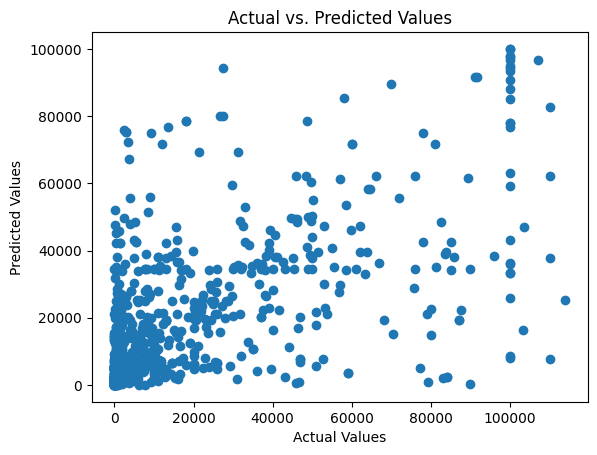

In [32]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

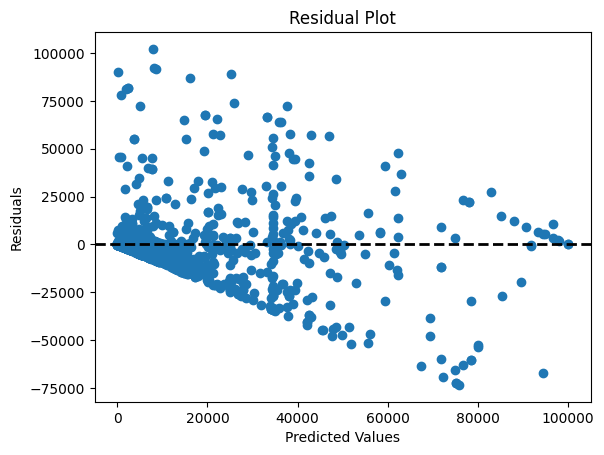

In [33]:
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

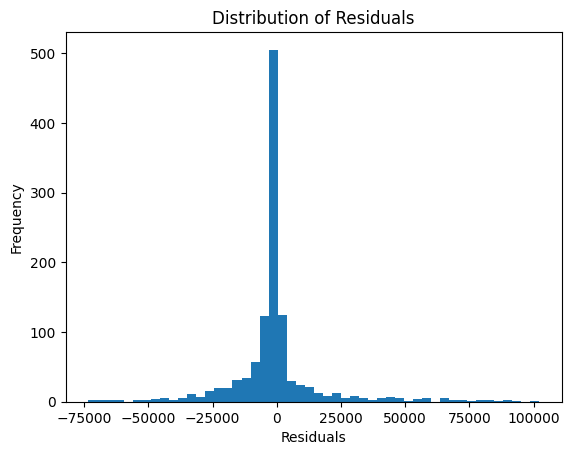

In [34]:
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

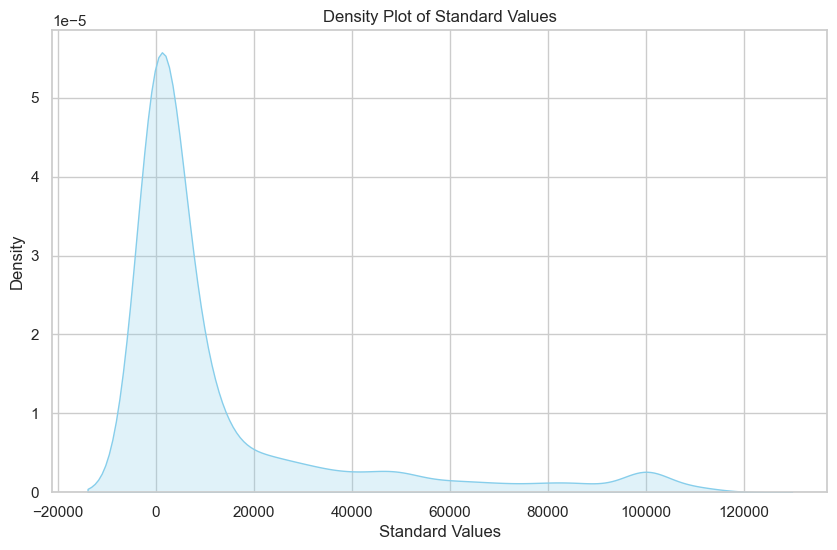

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.kdeplot(df['standard_value'], fill=True, color='skyblue')

plt.xlabel('Standard Values')
plt.ylabel('Density')
plt.title('Density Plot of Standard Values')

plt.show()

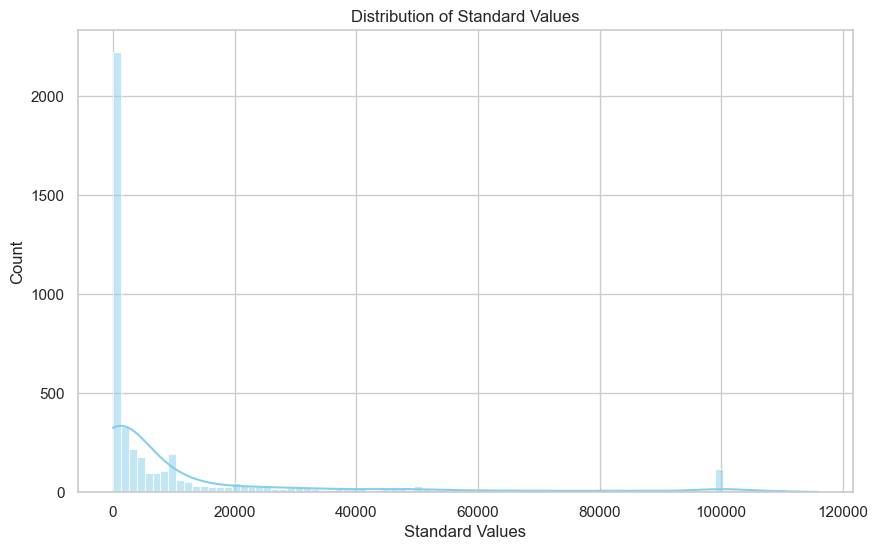

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(df['standard_value'], kde=True, fill=True, color='skyblue')

plt.xlabel('Standard Values')
plt.ylabel('Count')
plt.title('Distribution of Standard Values')

plt.show()

In [37]:
y = df['activity_class']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.825945945945946
Classification Report:
               precision    recall  f1-score   support

      active       0.82      0.83      0.83       459
    inactive       0.83      0.82      0.83       466

    accuracy                           0.83       925
   macro avg       0.83      0.83      0.83       925
weighted avg       0.83      0.83      0.83       925



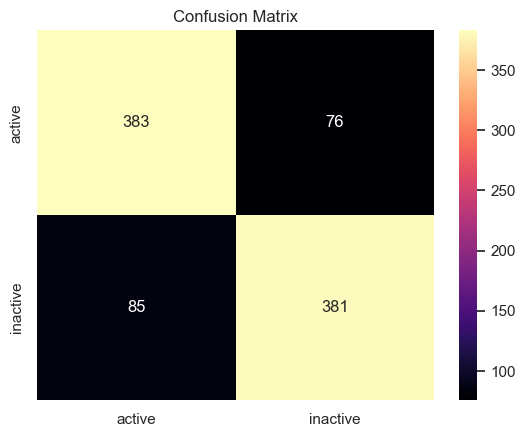

In [40]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=clf.classes_, yticklabels=clf.classes_)

plt.title('Confusion Matrix')
plt.show()

In [41]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

In [42]:
# Create the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [43]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_clf = RandomForestClassifier(random_state=42, **best_params)
best_clf.fit(X_train, y_train)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 300}


RandomForestClassifier(max_depth=20, min_samples_split=15, n_estimators=300,
                       random_state=42)

In [44]:
# Predict on the test set using the best model
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8227027027027027
Classification Report:
               precision    recall  f1-score   support

      active       0.82      0.82      0.82       459
    inactive       0.82      0.83      0.82       466

    accuracy                           0.82       925
   macro avg       0.82      0.82      0.82       925
weighted avg       0.82      0.82      0.82       925



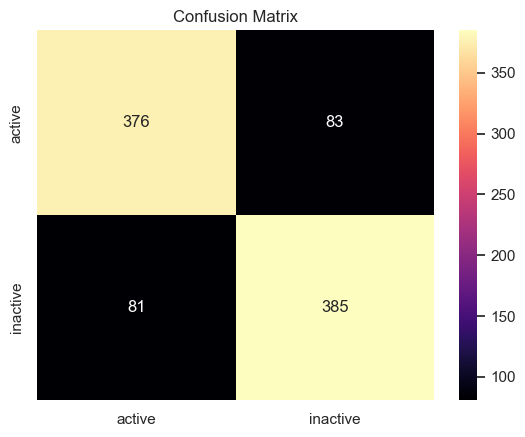

In [45]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=best_clf.classes_, yticklabels=best_clf.classes_)
plt.title('Confusion Matrix')
plt.show()

In [46]:
# Save the model using joblib
joblib.dump(best_clf, 'QSAR.h5')
joblib.dump(clf, 'QSAR2.h5')

joblib.dump(best_clf, 'QSAR.pkl')
joblib.dump(clf, 'QSAR2.pkl')

['QSAR2.pkl']